# Selecting the most suitable 1x12 drivetrain

# Problem description
A lot of bike riders are using data acquisition devices to log sensor data like GPS, heart rate, cadence and other. A biker is currently riding with 2x10 gear system (2 front chainrings and 10 rear cogs). The rider is considering an upgrade to 1x12 system to benefit from the latest developments in the industry. The following report analysis the most used gear ratio from existing logs (based on cadence and speed) of the user and suggest most suitable number of teeth for single front chainring and gear range for the cassette.

# Introduction
The rider of interest is currently using 2x11 Shimano drive system. The front chainrings are 52 and 34 teeth. The rear cassette is of range 11-28, or more precisely 11-12-13-14-15-17-19-21-23-25-28 teeth. The tyres are ETRTO 25-622 with circumference of 2.105m.

In [1]:
import numpy as np
from datetime import datetime, timedelta
from typing import Dict, Union, Optional,Tuple
import matplotlib.pyplot as plt
import pandas as pd
import os
import fitdecode
import seaborn as sns

# Data loading
The user uses a Garmin device. A *.fit file is created for each ride. All fit files are collected in a folder. There are three ride types: mountain, road and on a stationary trainer. The analysis will focus on road rides as the 1x12 upgrade is intended for the road bike.

In [2]:
# Let's print what data we have in a random file
with fitdecode.FitReader('2020-07-30-07-05-29.fit') as fit_file:
    for frame in fit_file:
        if isinstance(frame, fitdecode.records.FitDataMessage) and frame.name == 'record':
             # This frame contains data about a "track point".
            for field in frame.fields:
                print(field.name)
#there are also frame.name = 'lap', but they do not contain the information we need.

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_

fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
spe

distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence


unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
pos

unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long


cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitud

cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitud

unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
pos

altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cade

enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperatu

position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unkn

enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperatu

heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altit

heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altit

enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperatu

position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart

heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altit

position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart

cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitud

position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart

distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence


unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long


cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitud

altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cade

unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long


fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
spe

In [3]:
# The names of the columns we will use in our DataFrame. For the data we will be getting
# from the FIT data, we use the same name as the field names to make it easier to parse the data.
# more data is loaded than needed; it might be used in other analysis
RECORDS_COLUMN_NAMES = ['latitude', 'longitude', 'lap', 'altitude', 'timestamp', 'heart_rate', 'cadence', \
                       'speed', 'distance', 'temperature']
# "enhanced_speed", "enhanced_altitude", "fractional_cadence" do not have any additional information

def get_fit_data(frame: fitdecode.records.FitDataMessage) -> Optional[Dict[str, Union[float, int, str, datetime]]]:
    """
    Extract data from a FIT frame, representing a track point,
    and return it as a dict. Only activities with track are returned; stationary activities do not have latitude
    and longitude and the function returns None
    """
    data: Dict[str, Union[float, int, str, datetime]] = {}
    
    if not (frame.has_field('position_lat') and frame.has_field('position_long')):
        # Frame does not have any latitude or longitude data. We will ignore these frames in order to keep things simple
        return None
    else:
        data['latitude'] = frame.get_value('position_lat') / ((2**32) / 360) #saved in degrees
        data['longitude'] = frame.get_value('position_long') / ((2**32) / 360) #saved in degrees
    
    for field in RECORDS_COLUMN_NAMES[3:]:
        if frame.has_field(field):
            data[field] = frame.get_value(field)
    
    return data
    

def get_dataframe(fname: str) -> Tuple[pd.DataFrame]:
    """
    Takes the path to a FIT file (as a string) and returns
    DataFrame, containing data about the individual records.
    """

    records_data = []
    lap_no = 1
    with fitdecode.FitReader(fname) as fit_file:
        for frame in fit_file:
            if isinstance(frame, fitdecode.records.FitDataMessage):
                if frame.name == 'record':
                    single_record_data = get_fit_data(frame)
                    if single_record_data is not None:
                        single_record_data['lap'] = lap_no
                        records_data.append(single_record_data)
                elif frame.name == 'lap':
                    lap_no += 1
    
    # Create DataFrames from the data we have collected. If any information is missing,
    # it will show up as a null value or "NaN" in the DataFrame.
    record_df = pd.DataFrame(records_data, columns=RECORDS_COLUMN_NAMES)
    
    return record_df


# path = '2020-07-30-07-05-29.fit' # Yambol
path = '2017-12-07-08-38-00.fit' # ?


records_df = get_dataframe(path)

In [4]:
def is_road_file(file_path):
    has_cadence = False
    with fitdecode.FitReader(file_path) as fit_file:
        for frame in fit_file:
            if isinstance(frame, fitdecode.records.FitDataMessage):
                if frame.name == 'device_info':
                    for field in frame.fields:
                        if field.name == "antplus_device_type":
                            if field.value == "fitness_equipment":
                                return False
                            if field.value == "bike_cadence":
                                #only the road bike has cadance sensor
                                has_cadence = True
                if frame.name == "record":
                    # we have checked the header 
                    break
    return has_cadence

def get_all_road_rides(folder_path):
    folder_road_rides = pd.DataFrame()
    for entry in os.scandir(folder_path):
        if entry.is_file and entry.name.split(".")[-1] == "fit":
            if is_road_file(entry.path):
                file_frame = get_dataframe(entry.path)
                average_speed = file_frame.speed.mean()
                average_cadance = file_frame.cadence.mean()
                distance = file_frame.distance.iloc[-1]
                print(f"""{entry.name}:
                    average speed = {average_speed}
                    average cadence = {average_cadance}
                    distance = {distance}""")
                folder_road_rides = pd.concat([folder_road_rides, file_frame], ignore_index=True)
    return folder_road_rides

# EDA

Let's load only one ride and inspect the data inside. The same ride is uploaded on https://www.strava.com/activities/5537229796 Comparison with the upload will be made.

In [5]:
road_rides = get_all_road_rides(r"C:\Users\a1048794\OneDrive - PROD - sensata.com Azure AD (sso.sensata.com) (Not O365)\Documents\personal\SoftUni\Data science\project\data")
road_rides

2021-06-27-08-00-53.fit:
                    average speed = 7.703838172560895
                    average cadence = 63.287750865051905
                    distance = 165349.71


,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature
0,42.671546,23.295498,1,583.4,2021-06-27 05:00:53+00:00,114.0,48.0,4.899,4.90,25
1,42.671560,23.295457,1,585.4,2021-06-27 05:00:54+00:00,115.0,48.0,4.731,9.63,25
2,42.671601,23.295406,1,585.6,2021-06-27 05:00:55+00:00,115.0,32.0,4.796,14.43,25
3,42.671631,23.295350,1,585.4,2021-06-27 05:00:56+00:00,115.0,32.0,4.796,19.22,25
4,42.671647,23.295305,1,585.4,2021-06-27 05:00:57+00:00,114.0,32.0,4.684,23.91,25
...,...,...,...,...,...,...,...,...,...,...
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35
7264,42.685612,23.139062,34,771.8,2021-06-27 11:57:17+00:00,120.0,0.0,1.381,165349.71,35
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.000,165349.71,35


In [6]:
road_rides.dtypes

latitude                   float64
longitude                  float64
lap                          int64
altitude                   float64
timestamp      datetime64[ns, UTC]
heart_rate                 float64
cadence                    float64
speed                      float64
distance                   float64
temperature                  int64
dtype: object

In [7]:
road_rides.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,7267.0,42.666341,0.046488,42.566613,42.626655,42.682601,42.706885,42.733819
longitude,7267.0,23.649968,0.247663,23.138662,23.436341,23.722136,23.860254,24.001795
lap,7267.0,17.209440,9.188901,1.000000,10.000000,17.000000,24.000000,34.000000
altitude,7267.0,663.015770,103.385607,510.200000,578.200000,637.200000,734.400000,924.200000
heart_rate,7249.0,139.485308,20.567335,72.000000,127.000000,142.000000,155.000000,179.000000
cadence,7225.0,63.287751,34.137560,0.000000,37.000000,80.000000,89.000000,114.000000
speed,7267.0,7.703838,3.842450,0.000000,4.600000,7.521000,10.245000,17.878000
distance,7267.0,83664.625826,46002.432023,4.900000,49117.565000,84490.640000,117117.800000,165349.710000
temperature,7267.0,26.899684,5.011793,19.000000,22.000000,26.000000,31.000000,38.000000


The data seems realistic and comparable with the analysis provided on Strava web page. The measuring units are as follows:
- latitude and longitude : °
- altitude : m
- heart_rate : bpm
- cadence : rpm
- speed : m/s (not km/h)
- distance : m
- temperature : °C

## Sampling rate

At first glance it looks like the sampling is each second. Let's confirm.

In [8]:
sampling_time = [np.NaN]
for i in range(1, len(road_rides)):
    sampling_time.append((road_rides.timestamp.iloc[i] - road_rides.timestamp.iloc[i-1]).total_seconds())
sampling_time = pd.Series(sampling_time)

In [9]:
def to_seconds(x):
    return x.total_seconds()


sampling_time = road_rides.timestamp.diff().apply(to_seconds) #.apply(total_seconds())

In [10]:
sampling_time.unique()

array([      nan, 1.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 4.000e+00,
       7.000e+00, 5.000e+00, 1.200e+01, 8.000e+00, 9.000e+00, 1.900e+01,
       2.100e+01, 1.000e+01, 1.400e+01, 1.300e+01, 1.500e+01, 1.100e+01,
       1.800e+01, 2.200e+01, 1.700e+01, 2.300e+01, 2.000e+01, 3.100e+01,
       2.500e+01, 2.800e+01, 2.600e+01, 1.600e+01, 1.959e+03, 5.000e+01])

The sampling is not every second. There is also one very long duration of 1959s. Let's try to find what is the logic.

In [11]:
sampling_time.name = "duration"
road_rides = pd.concat([road_rides, sampling_time], axis=1)

In [12]:
road_rides[road_rides.duration > 100]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0


In [13]:
road_rides[3920:3930]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
3920,42.655982,23.821497,18,728.2,2021-06-27 08:27:38+00:00,139.0,59.0,2.146,89611.47,26,4.0
3921,42.655976,23.821507,18,728.4,2021-06-27 08:27:39+00:00,138.0,59.0,0.000,89611.47,26,1.0
3922,42.655975,23.821510,18,728.4,2021-06-27 08:27:42+00:00,137.0,0.0,0.000,89611.47,26,3.0
3923,42.655975,23.821510,18,728.6,2021-06-27 08:27:43+00:00,137.0,0.0,0.000,89611.47,26,1.0
3924,42.655975,23.821510,18,729.0,2021-06-27 08:27:49+00:00,136.0,0.0,0.000,89611.47,26,6.0
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0
3926,42.655718,23.821624,18,730.0,2021-06-27 09:00:29+00:00,101.0,66.0,7.437,89625.65,26,1.0
3927,42.655605,23.821860,18,729.8,2021-06-27 09:00:32+00:00,101.0,20.0,8.659,89650.44,26,3.0
3928,42.655513,23.822060,18,729.4,2021-06-27 09:00:34+00:00,101.0,0.0,9.293,89668.83,26,2.0
3929,42.655394,23.822349,18,728.6,2021-06-27 09:00:37+00:00,NaN,0.0,9.797,89698.07,26,3.0


Looking into the row with the highest duration and the GPS coordinates, we quickly realize the rider has been on a restaurant stop. It looks like the device manages logging frequency internally, most probably to preserve battery life. 

In [14]:
road_rides[road_rides.duration > 10].sample(10)

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
3887,42.654290,23.822882,18,722.6,2021-06-27 08:26:13+00:00,106.0,0.0,0.000,89299.61,25,13.0
571,42.706885,23.456884,3,529.2,2021-06-27 05:35:53+00:00,88.0,0.0,0.000,14647.95,20,14.0
333,42.699756,23.369114,2,530.8,2021-06-27 05:17:24+00:00,94.0,0.0,0.000,7323.91,20,21.0
5145,42.567759,23.705447,22,853.6,2021-06-27 09:55:54+00:00,108.0,0.0,0.000,109597.11,29,12.0
2498,42.702763,23.925129,12,776.8,2021-06-27 07:18:14+00:00,94.0,0.0,0.000,57370.51,24,19.0
5147,42.567759,23.705447,22,853.0,2021-06-27 09:56:09+00:00,102.0,0.0,0.000,109597.11,29,13.0
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0
6393,42.700023,23.310318,30,555.0,2021-06-27 11:05:01+00:00,119.0,43.0,4.861,148022.94,33,20.0
584,42.706885,23.456884,3,529.0,2021-06-27 05:37:14+00:00,81.0,0.0,0.000,14647.95,20,21.0
618,42.706885,23.456884,3,528.6,2021-06-27 05:42:11+00:00,75.0,NaN,0.000,14647.95,20,25.0


The device increases logging time when the speed and cadence are 0.

## Altitude

In [15]:
pd.isna(road_rides.altitude).any()

False

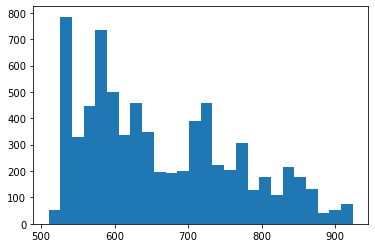

In [16]:
plt.hist(road_rides.altitude, bins="fd")
plt.show()

All entries contain altitude value. The sensor type is barometric.

## Heart rate

In [17]:
road_rides.heart_rate.unique()

array([114., 115., 113., 110., 109., 108., 107., 104., 101., 102., 105.,
       111., 116., 117., 118., 120., 123., 124., 125., 126., 127., 130.,
       132., 133., 134., 136., 137., 138., 139., 141., 140., 135., 131.,
       142., 143., 145., 146., 149., 153., 155., 156., 151., 148., 128.,
       122., 119., 112., 144., 147., 129., 121., 106., 150.,  nan,  99.,
        96.,  95.,  92.,  88.,  85.,  89.,  94.,  91.,  93.,  90.,  87.,
        84., 100.,  97.,  86.,  83., 103.,  98.,  81.,  78.,  75.,  80.,
        79.,  82.,  76.,  77.,  73.,  72., 152., 154., 158., 160., 161.,
       162., 159., 157., 163., 164., 166., 167., 168., 165., 169., 170.,
       171., 172., 173., 174., 175., 176., 177., 178., 179.])

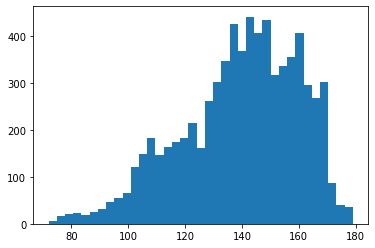

In [18]:
plt.hist(road_rides.heart_rate, bins="fd")
plt.show()

In [19]:
road_rides[pd.isna(road_rides.heart_rate)]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
316,42.699740,23.368918,2,531.2,2021-06-27 05:15:33+00:00,NaN,0.0,4.852,7307.23,20,1.0
2365,42.703722,23.912650,12,872.2,2021-06-27 07:12:30+00:00,NaN,33.0,14.882,55790.76,21,2.0
2384,42.703427,23.916309,12,848.4,2021-06-27 07:12:56+00:00,NaN,0.0,13.688,56163.61,21,1.0
2385,42.703408,23.916463,12,847.2,2021-06-27 07:12:57+00:00,NaN,0.0,14.052,56177.66,21,1.0
2395,42.702626,23.918040,12,837.6,2021-06-27 07:13:08+00:00,NaN,0.0,15.498,56341.18,21,1.0
2396,42.702669,23.918225,12,836.4,2021-06-27 07:13:09+00:00,NaN,0.0,15.704,56356.88,21,1.0
2427,42.702594,23.922981,12,804.2,2021-06-27 07:13:47+00:00,NaN,0.0,15.414,56929.23,22,1.0
2428,42.702431,23.923335,12,802.2,2021-06-27 07:13:49+00:00,NaN,0.0,15.256,56959.74,22,2.0
2453,42.702987,23.924390,12,784.0,2021-06-27 07:14:18+00:00,NaN,0.0,9.751,57298.08,22,1.0
2454,42.703046,23.924475,12,783.4,2021-06-27 07:14:19+00:00,NaN,0.0,8.640,57306.72,22,1.0


There are some missing hear rate entries, most probably due to device communication issue or pad electrical contact to the body. The amount of missing data is low and it is not also not essential for the defined problem.

Heart rate could be used for some approximation for power. Due to physiological reasons, the heart rate has significant lag from power output.

## Cadence

In [20]:
np.sort(road_rides.cadence.unique())

array([  0.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114.,  nan])

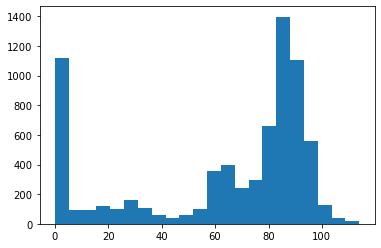

In [21]:
plt.hist(road_rides.cadence, bins="fd")
plt.show()

In [22]:
road_rides[pd.isna(road_rides.cadence)]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
605,42.706885,23.456884,3,528.8,2021-06-27 05:39:43+00:00,77.0,NaN,0.000,14647.95,20,4.0
606,42.706885,23.456884,3,529.0,2021-06-27 05:40:03+00:00,81.0,NaN,0.000,14647.95,20,20.0
607,42.706885,23.456884,3,529.0,2021-06-27 05:40:06+00:00,85.0,NaN,0.000,14647.95,20,3.0
608,42.706885,23.456884,3,528.6,2021-06-27 05:40:37+00:00,82.0,NaN,0.000,14647.95,20,31.0
609,42.706885,23.456884,3,528.6,2021-06-27 05:40:45+00:00,79.0,NaN,0.000,14647.95,20,8.0
610,42.706885,23.456884,3,528.6,2021-06-27 05:40:49+00:00,76.0,NaN,0.000,14647.95,20,4.0
611,42.706885,23.456884,3,528.6,2021-06-27 05:40:53+00:00,79.0,NaN,0.000,14647.95,20,4.0
612,42.706885,23.456884,3,528.6,2021-06-27 05:41:05+00:00,76.0,NaN,0.000,14647.95,20,12.0
613,42.706885,23.456884,3,528.6,2021-06-27 05:41:08+00:00,73.0,NaN,0.000,14647.95,20,3.0
614,42.706885,23.456884,3,528.6,2021-06-27 05:41:14+00:00,76.0,NaN,0.000,14647.95,20,6.0


In [23]:
road_rides[640:655]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
640,42.706885,23.456884,3,528.0,2021-06-27 05:45:42+00:00,78.0,NaN,0.000,14647.95,20,14.0
641,42.706885,23.456884,3,528.0,2021-06-27 05:45:45+00:00,75.0,NaN,0.000,14647.95,20,3.0
642,42.706885,23.456884,3,528.0,2021-06-27 05:45:51+00:00,72.0,NaN,0.000,14647.95,20,6.0
643,42.706886,23.456884,3,528.0,2021-06-27 05:45:56+00:00,77.0,NaN,0.000,14648.05,20,5.0
644,42.706913,23.456874,3,528.0,2021-06-27 05:45:58+00:00,82.0,NaN,2.351,14652.93,20,2.0
645,42.706925,23.456858,3,528.0,2021-06-27 05:45:59+00:00,83.0,NaN,2.678,14655.61,20,1.0
646,42.706938,23.456839,3,528.0,2021-06-27 05:46:00+00:00,85.0,NaN,2.725,14658.33,20,1.0
647,42.706953,23.456819,3,528.0,2021-06-27 05:46:01+00:00,88.0,0.0,3.079,14661.41,20,1.0
648,42.707001,23.456792,3,528.0,2021-06-27 05:46:03+00:00,91.0,0.0,2.622,14666.92,20,2.0
649,42.707052,23.456800,3,528.0,2021-06-27 05:46:05+00:00,94.0,0.0,3.210,14672.97,20,2.0


There are some entries for cadence with nan value. These values are recorded when the cranks are not rotated. The nan values become 0 and than return to normal. Checking the GPS coordinates reveals that this is a gas station where the teammates meet for the ride. The bike was not moving.

In [24]:
road_rides[(road_rides.cadence == 0) & (road_rides.speed > 0)]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
6,42.671719,23.295143,1,585.2,2021-06-27 05:01:00+00:00,110.0,0.0,4.581,37.78,25,2.0
7,42.671739,23.295108,1,585.4,2021-06-27 05:01:01+00:00,109.0,0.0,4.563,42.35,25,1.0
8,42.671772,23.295050,1,585.0,2021-06-27 05:01:02+00:00,108.0,0.0,4.563,46.91,25,1.0
9,42.671810,23.294953,1,584.8,2021-06-27 05:01:04+00:00,108.0,0.0,5.020,56.80,25,2.0
20,42.672510,23.295226,1,584.8,2021-06-27 05:01:22+00:00,105.0,0.0,6.186,148.08,25,2.0
...,...,...,...,...,...,...,...,...,...,...,...
7012,42.706526,23.153673,33,642.0,2021-06-27 11:43:08+00:00,138.0,0.0,6.933,162130.74,35,3.0
7035,42.705199,23.148504,33,644.0,2021-06-27 11:44:25+00:00,127.0,0.0,1.652,162588.24,35,4.0
7036,42.705197,23.148478,33,644.2,2021-06-27 11:44:27+00:00,124.0,0.0,1.297,162590.35,35,2.0
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35,3.0


There are a lot of entries when the bike is moving by inertia and the cranks are not rotated.

In [25]:
road_rides[(road_rides.cadence > 0) & (road_rides.cadence < 30)] # this range is really low cadence

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
10,42.671826,23.294951,1,585.0,2021-06-27 05:01:05+00:00,108.0,25.0,5.197,61.99,25,1.0
11,42.671919,23.295020,1,585.0,2021-06-27 05:01:08+00:00,107.0,25.0,5.729,79.08,25,3.0
12,42.671975,23.294993,1,585.0,2021-06-27 05:01:09+00:00,107.0,25.0,5.561,84.64,25,1.0
13,42.672063,23.294997,1,585.0,2021-06-27 05:01:11+00:00,107.0,25.0,5.365,95.55,25,2.0
14,42.672109,23.295174,1,585.0,2021-06-27 05:01:12+00:00,107.0,14.0,5.244,100.79,25,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7154,42.695021,23.148388,33,711.0,2021-06-27 11:50:36+00:00,141.0,21.0,4.311,163994.40,33,4.0
7260,42.685669,23.138902,34,772.2,2021-06-27 11:57:08+00:00,129.0,25.0,2.771,165334.41,35,3.0
7261,42.685640,23.138962,34,772.2,2021-06-27 11:57:11+00:00,125.0,25.0,1.110,165339.99,35,3.0
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35,1.0


In [26]:
# road_rides[17:25]

In [27]:
# road_rides[90:110]

In [28]:
# road_rides[270:280]

In [29]:
road_rides[(road_rides.cadence > 0) & (road_rides.cadence < 30)].sample(20) 

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
233,42.696376,23.349675,2,535.2,2021-06-27 05:11:31+00:00,135.0,18.0,8.482,5662.75,19,3.0
4462,42.619234,23.747708,20,652.6,2021-06-27 09:23:35+00:00,116.0,16.0,12.531,99621.19,29,1.0
6256,42.689501,23.339160,30,554.2,2021-06-27 10:57:40+00:00,134.0,29.0,8.892,145325.30,34,1.0
4082,42.638978,23.814755,19,731.4,2021-06-27 09:07:11+00:00,139.0,21.0,9.396,91903.11,30,1.0
2673,42.684209,23.952396,13,631.6,2021-06-27 07:23:41+00:00,127.0,29.0,14.780,61169.35,26,1.0
1680,42.732623,23.801651,9,776.8,2021-06-27 06:45:43+00:00,125.0,25.0,11.878,44453.75,21,2.0
2538,42.699835,23.926513,12,763.4,2021-06-27 07:19:52+00:00,98.0,18.0,13.343,57781.92,26,2.0
3755,42.646674,23.847047,18,753.6,2021-06-27 08:20:29+00:00,122.0,21.0,11.066,86770.99,23,5.0
2632,42.692554,23.938915,12,660.2,2021-06-27 07:21:59+00:00,139.0,17.0,15.694,59723.17,26,3.0
249,42.696808,23.353726,2,536.4,2021-06-27 05:12:15+00:00,131.0,27.0,6.298,6001.06,19,3.0


There are a moderate amount of entries with low cadence. Picking random samples and checking the GPS coordinates, indicates most of them are in urban areas where the rider has to adapt to signal lights and road traffic. This rates  happen during acceleration from a stop when too high gear is engaged. Other possible use of low cadence is during out of the saddle efforts.

## Speed

In [30]:
pd.isna(road_rides.speed).any()

False

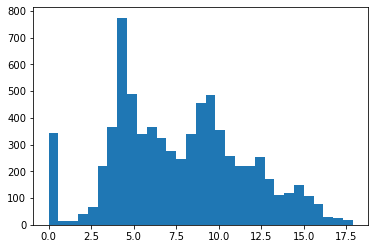

In [31]:
plt.hist(road_rides.speed, bins="fd")
plt.show()

Every entry has a speed value, that could be 0m/s.

## Distance

There are two possible ways to calculate distance
- by integrating speed over time
- by calculating the length of the GPS track.

Integration over the speed will be performed to compare the results.

In [32]:
road_rides

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
0,42.671546,23.295498,1,583.4,2021-06-27 05:00:53+00:00,114.0,48.0,4.899,4.90,25,NaN
1,42.671560,23.295457,1,585.4,2021-06-27 05:00:54+00:00,115.0,48.0,4.731,9.63,25,1.0
2,42.671601,23.295406,1,585.6,2021-06-27 05:00:55+00:00,115.0,32.0,4.796,14.43,25,1.0
3,42.671631,23.295350,1,585.4,2021-06-27 05:00:56+00:00,115.0,32.0,4.796,19.22,25,1.0
4,42.671647,23.295305,1,585.4,2021-06-27 05:00:57+00:00,114.0,32.0,4.684,23.91,25,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35,1.0
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35,3.0
7264,42.685612,23.139062,34,771.8,2021-06-27 11:57:17+00:00,120.0,0.0,1.381,165349.71,35,2.0
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.000,165349.71,35,4.0


In [33]:
calculated_distance = (road_rides.duration * road_rides.speed).cumsum()
calculated_distance.name = "calc_distance"
calculated_distance

0              NaN
1            4.731
2            9.527
3           14.323
4           19.007
           ...    
7262    178754.284
7263    178760.275
7264    178763.037
7265    178763.037
7266    178763.037
Name: calc_distance, Length: 7267, dtype: float64

The first entry for distance is known to the device. Most probably there is an initiation sensor reading that allows it to be calculated. The total distance differ.

In [34]:
calculated_distance[0] = 0
calculated_distance = calculated_distance + road_rides.distance[0]
calculated_distance

0            4.900
1            9.631
2           14.427
3           19.223
4           23.907
           ...    
7262    178759.184
7263    178765.175
7264    178767.937
7265    178767.937
7266    178767.937
Name: calc_distance, Length: 7267, dtype: float64

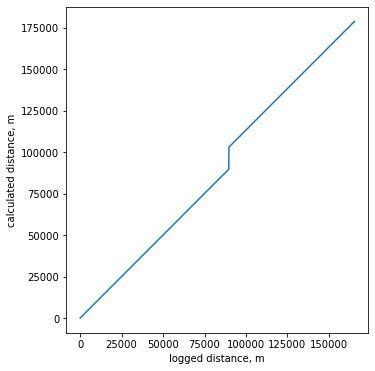

In [35]:
plt.figure(figsize=(6,6))
plt.plot(road_rides.distance, calculated_distance)
plt.xlabel("logged distance, m")
plt.ylabel("calculated distance, m")
plt.gca().set_aspect('equal')
plt.show()

In [46]:
road_rides = pd.concat([road_rides, calculated_distance], axis=1)
road_rides[(road_rides.duration * road_rides.speed) > 100]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,calc_distance,calc_distance,calc_distance,calc_distance
286,42.697928,23.360775,2,529.2,2021-06-27 05:13:50+00:00,136.0,32.0,9.583,6625.03,20,12.0,6634.811,6634.811,6634.811,6634.811
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0,102915.992,102915.992,102915.992,102915.992
6534,42.709744,23.273300,31,578.8,2021-06-27 11:13:45+00:00,164.0,91.0,10.460,151294.11,34,50.0,164716.298,164716.298,164716.298,164716.298


In [48]:
road_rides[3920:3930]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,calc_distance,calc_distance,calc_distance,calc_distance
3920,42.655982,23.821497,18,728.2,2021-06-27 08:27:38+00:00,139.0,59.0,2.146,89611.47,26,4.0,89700.578,89700.578,89700.578,89700.578
3921,42.655976,23.821507,18,728.4,2021-06-27 08:27:39+00:00,138.0,59.0,0.000,89611.47,26,1.0,89700.578,89700.578,89700.578,89700.578
3922,42.655975,23.821510,18,728.4,2021-06-27 08:27:42+00:00,137.0,0.0,0.000,89611.47,26,3.0,89700.578,89700.578,89700.578,89700.578
3923,42.655975,23.821510,18,728.6,2021-06-27 08:27:43+00:00,137.0,0.0,0.000,89611.47,26,1.0,89700.578,89700.578,89700.578,89700.578
3924,42.655975,23.821510,18,729.0,2021-06-27 08:27:49+00:00,136.0,0.0,0.000,89611.47,26,6.0,89700.578,89700.578,89700.578,89700.578
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0,102915.992,102915.992,102915.992,102915.992
3926,42.655718,23.821624,18,730.0,2021-06-27 09:00:29+00:00,101.0,66.0,7.437,89625.65,26,1.0,102923.429,102923.429,102923.429,102923.429
3927,42.655605,23.821860,18,729.8,2021-06-27 09:00:32+00:00,101.0,20.0,8.659,89650.44,26,3.0,102949.406,102949.406,102949.406,102949.406
3928,42.655513,23.822060,18,729.4,2021-06-27 09:00:34+00:00,101.0,0.0,9.293,89668.83,26,2.0,102967.992,102967.992,102967.992,102967.992
3929,42.655394,23.822349,18,728.6,2021-06-27 09:00:37+00:00,NaN,0.0,9.797,89698.07,26,3.0,102997.383,102997.383,102997.383,102997.383


In [51]:
9.63-4.9

4.73

Looking at row 3925 it looks like the distance increment must be obtained by multiplying speed[i-1] by duration[i]. But the first two rows indicate this approach will also not give correct results.

In [54]:
road_rides.distance[1] - road_rides.distance[0] # 4.73 is the speed at row 1 by the duration in time 1.

4.73

In [53]:
road_rides.head(5)

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,calc_distance,calc_distance,calc_distance,calc_distance
0,42.671546,23.295498,1,583.4,2021-06-27 05:00:53+00:00,114.0,48.0,4.899,4.90,25,NaN,4.900,4.900,4.900,4.900
1,42.671560,23.295457,1,585.4,2021-06-27 05:00:54+00:00,115.0,48.0,4.731,9.63,25,1.0,9.631,9.631,9.631,9.631
2,42.671601,23.295406,1,585.6,2021-06-27 05:00:55+00:00,115.0,32.0,4.796,14.43,25,1.0,14.427,14.427,14.427,14.427
3,42.671631,23.295350,1,585.4,2021-06-27 05:00:56+00:00,115.0,32.0,4.796,19.22,25,1.0,19.223,19.223,19.223,19.223
4,42.671647,23.295305,1,585.4,2021-06-27 05:00:57+00:00,114.0,32.0,4.684,23.91,25,1.0,23.907,23.907,23.907,23.907


It is not very clear (for me) how exactly the distance is calculated. The distance calculated by the Garmin device will be accepted as the correct one.

In [56]:
road_rides = road_rides.drop(columns="calc_distance")

In [37]:
# road_rides.corr()

(array([7.265e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.9680e+02, 3.9260e+02, 5.8840e+02, 7.8420e+02,
        9.8000e+02, 1.1758e+03, 1.3716e+03, 1.5674e+03, 1.7632e+03,
        1.9590e+03]),
 <BarContainer object of 10 artists>)

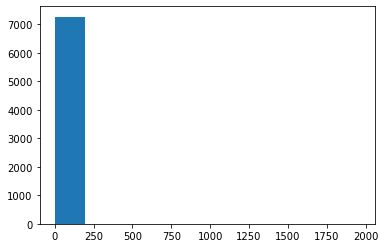

In [38]:
plt.hist(road_rides.duration)

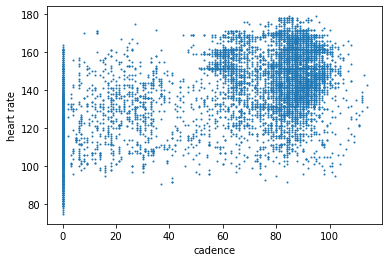

In [39]:
# some correlation between heart rate and cadance is seen; this is expected from scientific point of view.
plt.scatter(road_rides.cadence, road_rides.heart_rate, s=1)
plt.xlabel("cadence")
plt.ylabel("heart rate")
plt.show()

There is no correlation between cadence and heart rate from the graph. The points are 0 cadence are when the rider is not pedaling, but his heart is still working ;)
Other possible correlation might appear between slope and heart rate.

## Gear ratios

In [40]:
TYRE_CIRCUMFERENCE = 2.105 # in m
gear_ratios = (road_rides.speed / TYRE_CIRCUMFERENCE) / (road_rides.cadence / 60) # dimensionless; number of chainring theeth divided by the cog theeth

(-2.0, 20.0)

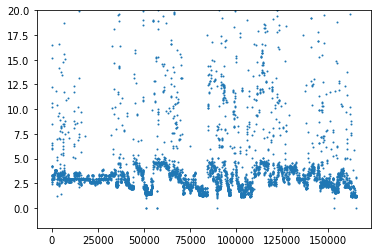

In [41]:
plt.scatter(road_rides.distance, gear_ratios, s=1)
plt.ylim(-2, 20)

It is possible the rider to be moving by inertia, i.e. the cadence is zero (or close to) and the bike is moving. A criteria for minimum cadence should be established. 

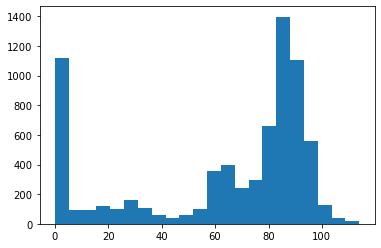

In [42]:
plt.hist(road_rides.cadence, bins="fd")
plt.show()

In [43]:
road_rides_powered = road_rides[road_rides.cadence > 40] 
# other possible approach is to filter by max available gear ratio
plt.scatter(road_rides_powered.distance, road_rides_powered.gear_r, s=1)
plt.ylim(-2, 20)

AttributeError: 'DataFrame' object has no attribute 'gear_r'

In [ ]:
gear_ratios_below10 = gear_ratios[gear_ratios < 10.0]

In [ ]:
plt.hist(road_rides_powered.gear_r, bins = 30)
plt.show()

In [ ]:
road_rides_powered = road_rides_powered.dropna()

In [ ]:
road_rides_powered.corr()

In [ ]:
plt.scatter(road_rides_powered.gear_r, road_rides_powered.speed, s=1)

In [ ]:
plt.scatter(road_rides_powered.gear_r, road_rides_powered.slope, s=1)

In [ ]:
plt.scatter(road_rides_powered.slope, road_rides_powered.speed, s=1)
plt.xlabel("slope")
plt.ylabel("speed")
plt.xlim(-0.1, 0.2)
plt.show()

Very interesting graph. It outlines point families on certain curves. These curves represent the gear ratios. Note how the length of the curve indicates it's usable range.

In [ ]:
# 3debug
# road_rides_powered.slope

In [ ]:
x = np.linspace(0.01, 0.2, 20)
# coef = 
y = 8* 0.07/x
y2 = 8* 0.08/x

plt.figure(figsize=(12, 12))
plt.plot(x, y, color="red")
plt.plot(x, y2, color="red")

plt.hist2d(road_rides_powered.slope, road_rides_powered.speed, bins=300, cmap=plt.cm.jet, cmin=1, cmax=10)
plt.title("")
plt.xlabel("slope")
plt.ylabel("speed, m/s")
# plt.gca().set_aspect('equal')
plt.xlim(-0.1, 0.2)
plt.grid()
plt.plot()

The strange line pattern collide with the equation slope * speed = const, or 
(d(amplitude) / d(distance)) * (d(distance) / dt) =d(amplitude) / dt = const

In [ ]:
road_rides_powered.reset_index(inplace=True)

In [ ]:
road_rides_powered[(road_rides_powered.slope * road_rides_powered.speed > 8*0.07) & (road_rides_powered.slope * road_rides_powered.speed < 8*0.08)]

In [ ]:
road_rides_powered[835:840]

In [ ]:
(road_rides_powered.altitude.iloc[837] - road_rides_powered.altitude.iloc[836] ) / (road_rides_powered.distance.iloc[837] - road_rides_powered.distance.iloc[836] )

Let's try to plot the cadence as contour on the graph above. 

In [ ]:
sns.set_theme(style="white")

sns.relplot(x="slope", y="speed", hue="cadence",
            alpha=.5, palette=sns.color_palette("flare", as_cmap=True),
            height=6, data=road_rides_powered)
plt.xlim(-0.1, 0.2)
plt.show()

In [ ]:
plt.scatter(road_rides_powered.slope, road_rides_powered.cadence, s=1)

In [ ]:
plt.scatter(road_rides_powered.cadence, road_rides_powered.slope, s=1)


In [ ]:
gear_ratios.name = "gear_r"
road_rides = pd.concat([road_rides, gear_ratios], axis=1)

In [ ]:
road_rides[(road_rides.gear_r > 20) & (road_rides.gear_r < 100)]

## Slopes

In [ ]:
slopes = {0: np.nan}
for i in range(1, len(road_rides)):
    delta_dist = (road_rides.distance.iloc[i] - road_rides.distance.iloc[i-1]) 
    if delta_dist != 0.0 and \
        road_rides.speed.iloc[i] > 1 and \
        road_rides.speed.iloc[i-1] > 1: # to make sure the rider is moving
        slopes[i] = (road_rides.altitude.iloc[i] - road_rides.altitude.iloc[i-1]) / delta_dist
        
    else:
        slopes[i] = np.nan
slopes = pd.Series(slopes)
slopes.name = "slope"

In [ ]:
road_rides = pd.concat([road_rides, slopes], axis=1)

In [ ]:
road_rides

More columns will be added to aid the analysis.

In [ ]:
road_rides.corr()

In [ ]:
plt.scatter(road_rides.speed, road_rides.slope, s=1)
# plt.ylim(-1, 1)

In [ ]:
plt.scatter(road_rides.distance, road_rides.altitude, s=1)

In [ ]:
plt.scatter(road_rides.distance, road_rides.slope, s=1)

In [ ]:
y = road_rides.slope.rolling(50, win_type='triang').mean()
plt.scatter(road_rides.distance, y, s=1)

In [ ]:
grads = np.gradient(road_rides.altitude, road_rides.distance, edge_order=2)

kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
grads_convolved_10 = np.convolve(grads, kernel, mode='same')

plt.figure(figsize=(16,8))
plt.scatter(road_rides.distance, grads, s=1)
plt.plot(road_rides.distance, grads_convolved_10, color="red")
plt.ylim(-0.1, 0.1)

In [ ]:
road_rides[road_rides.slope < -0.2]

In [ ]:
road_rides[150:170]

In [ ]:
plt.hist(road_rides.heart_rate, bins="fd")
plt.show()

In [ ]:
plt.hist(road_rides.cadence, bins="fd")
plt.show()

In [ ]:
plt.scatter(road_rides.cadence, road_rides.heart_rate, s=1)
plt.show()

In [ ]:
plt.plot(road_rides.distance, road_rides.altitude)
plt.show()

In [ ]:
road_rides.cadence.mean()

In [ ]:
road_rides[road_rides.cadence < 10]

In [ ]:
records_df = get_dataframe(r"data\2021-06-28-12-06-56.fit")

In [ ]:
records_df

In [ ]:
road_rides.sample(10)

In [ ]:
plt.plot(road_rides.distance, road_rides.speed)

In [ ]:
road_rides.describe().T

In [ ]:
records_df.distance.tail(1).tolist()[0]

In [ ]:
plt.plot(records_df.timestamp, records_df.temperature)

In [ ]:
records_df.dtypes

In [ ]:
records_df.altitude.hist(bins=20, density=True)
plt.xlabel("altitude")
plt.ylabel("count")
plt.show()

In [ ]:
plt.plot(records_df.distance, records_df.speed)

In [ ]:
plt.plot(records_df.distance, records_df.altitude)

In [ ]:
plt.plot(records_df.distance, records_df.heart_rate)

In [ ]:
records_df.corr()

# References
https://towardsdatascience.com/parsing-fitness-tracker-data-with-python-a59e7dc17418
